# CS 636: Midterm project: Equity Portfolio Management

## Team Members:
### 1. Akilesh Kannamukkala : ark72
### 2. Saumya Choksi : src65

## Loading Input Data

In [1]:
library("dplyr")
#Loading the CSV stock Files
ibm <- data.frame(read.csv("stocks/IBM.csv"))
aapl <- data.frame(read.csv("stocks/AAPL.csv"))
amzn <- data.frame(read.csv("stocks/AMZN.csv"))
fb <- data.frame(read.csv("stocks/FB.csv"))
goog <- data.frame(read.csv("stocks/GOOG.csv"))
msft <- data.frame(read.csv("stocks/MSFT.csv"))
nflx <- data.frame(read.csv("stocks/NFLX.csv"))
orcl <- data.frame(read.csv("stocks/ORCL.csv"))
sap <- data.frame(read.csv("stocks/SAP.csv"))
tsla <- data.frame(read.csv("stocks/TSLA.csv"))
#Loading the JPY Currency Conversion
jpy <- data.frame(read.csv("stocks/JPY.csv"))

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Combining the Close and AdjClose values for all the 10 stocks
stocks <- data.frame(ibm$Date,ibm$Close,ibm$Adj.Close,msft$Close,msft$Adj.Close,goog$Close,goog$Adj.Close,aapl$Close,aapl$Adj.Close,amzn$Close,amzn$Adj.Close,fb$Close,fb$Adj.Close,nflx$Close,nflx$Adj.Close,tsla$Close,tsla$Adj.Close,orcl$Close,orcl$Adj.Close,sap$Close,sap$Adj.Close)

In [3]:
head(stocks)

,ibm.Date,ibm.Close,ibm.Adj.Close,msft.Close,msft.Adj.Close,goog.Close,goog.Adj.Close,aapl.Close,aapl.Adj.Close,amzn.Close,...,fb.Close,fb.Adj.Close,nflx.Close,nflx.Adj.Close,tsla.Close,tsla.Adj.Close,orcl.Close,orcl.Adj.Close,sap.Close,sap.Adj.Close
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,135.7438,85.95,82.59932,1065.00,1065.00,43.0650,41.51358,1189.01,...,181.42,181.42,201.07,201.07,64.106,64.106,46.63,44.52202,112.39,107.6534
2,2018-01-03,158.49,139.4751,86.35,82.98373,1082.48,1082.48,43.0575,41.50634,1204.20,...,184.67,184.67,205.05,205.05,63.450,63.450,47.71,45.55319,113.31,108.5347
3,2018-01-04,161.70,142.3000,87.11,83.71412,1086.40,1086.40,43.2575,41.69914,1209.59,...,184.33,184.33,205.63,205.63,62.924,62.924,48.18,46.00195,115.05,110.2013
4,2018-01-05,162.49,142.9952,88.19,84.75201,1102.23,1102.23,43.7500,42.17389,1229.14,...,186.85,186.85,209.99,209.99,63.316,63.316,48.47,46.27884,116.33,111.4274
5,2018-01-08,163.47,143.8576,88.28,84.83849,1106.94,1106.94,43.5875,42.01725,1246.87,...,188.28,188.28,212.05,212.05,67.282,67.282,48.98,46.76578,114.80,109.9619
6,2018-01-09,163.83,144.1744,88.22,84.78084,1106.26,1106.26,43.5825,42.01243,1252.70,...,187.87,187.87,209.31,209.31,66.738,66.738,49.06,47.02458,114.16,109.3488


## Computing Dividends

In [4]:
#Computing the Dividends for the stocks and adding them to the main dataframe "stocks"
stocks <- mutate(stocks,ibm.Dividend = abs(round(((lag(ibm.Close)/ibm.Close) - (lag(ibm.Adj.Close)/ibm.Adj.Close)) * ibm.Close,3)),
              msft.Dividend = abs(round(((lag(msft.Close)/msft.Close) - (lag(msft.Adj.Close)/msft.Adj.Close)) * msft.Close,3)),
              goog.Dividend = abs(round(((lag(goog.Close)/goog.Close) - (lag(goog.Adj.Close)/goog.Adj.Close)) * goog.Close,3)),
              aapl.Dividend = abs(round(((lag(aapl.Close)/aapl.Close) - (lag(aapl.Adj.Close)/aapl.Adj.Close)) * aapl.Close,3)),
              amzn.Dividend = abs(round(((lag(amzn.Close)/amzn.Close) - (lag(amzn.Adj.Close)/amzn.Adj.Close)) * amzn.Close,3)),
              fb.Dividend = abs(round(((lag(fb.Close)/fb.Close) - (lag(fb.Adj.Close)/fb.Adj.Close)) * fb.Close,3)),
              nflx.Dividend = abs(round(((lag(nflx.Close)/nflx.Close) - (lag(nflx.Adj.Close)/nflx.Adj.Close)) * nflx.Close,3)),
              orcl.Dividend = abs(round(((lag(orcl.Close)/orcl.Close) - (lag(orcl.Adj.Close)/orcl.Adj.Close)) * orcl.Close,3)),
              sap.Dividend = abs(round(((lag(sap.Close)/sap.Close) - (lag(sap.Adj.Close)/sap.Adj.Close)) * sap.Close,3)),
              tsla.Dividend = abs(round(((lag(tsla.Close)/tsla.Close) - (lag(tsla.Adj.Close)/tsla.Adj.Close)) * tsla.Close,3)))
head(stocks)

,ibm.Date,ibm.Close,ibm.Adj.Close,msft.Close,msft.Adj.Close,goog.Close,goog.Adj.Close,aapl.Close,aapl.Adj.Close,amzn.Close,...,ibm.Dividend,msft.Dividend,goog.Dividend,aapl.Dividend,amzn.Dividend,fb.Dividend,nflx.Dividend,orcl.Dividend,sap.Dividend,tsla.Dividend
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,135.7438,85.95,82.59932,1065.00,1065.00,43.0650,41.51358,1189.01,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,158.49,139.4751,86.35,82.98373,1082.48,1082.48,43.0575,41.50634,1204.20,...,0,0,0,0,0,0,0,0.00,0,0
3,2018-01-04,161.70,142.3000,87.11,83.71412,1086.40,1086.40,43.2575,41.69914,1209.59,...,0,0,0,0,0,0,0,0.00,0,0
4,2018-01-05,162.49,142.9952,88.19,84.75201,1102.23,1102.23,43.7500,42.17389,1229.14,...,0,0,0,0,0,0,0,0.00,0,0
5,2018-01-08,163.47,143.8576,88.28,84.83849,1106.94,1106.94,43.5875,42.01725,1246.87,...,0,0,0,0,0,0,0,0.00,0,0
6,2018-01-09,163.83,144.1744,88.22,84.78084,1106.26,1106.26,43.5825,42.01243,1252.70,...,0,0,0,0,0,0,0,0.19,0,0


## Function to compute top 5 stocks

In [5]:
#A function created to compute the top 5 stocks with the hightest percentage change.
#This function returns a datafram with the 5 stocks and respective percentage changes.

update_difference <- function(d){
    nam<-list(ibm,msft,goog,aapl,amzn,fb,nflx,tsla,orcl,sap)
    #names(diff) <- list("IBM","MSFT","GOOG","AAPL","AMZN","FB","NFLX","TSLA","ORCL","SAP")
    df <- data.frame(
    name = c("ibm","msft","goog","aapl","amzn","fb","nflx","tsla","orcl","sap"),
    stringsAsFactors = FALSE)    
    prct <- c()
    for(j in 1:10){
        prct[j] <- ((nam[[j]]$Adj.Close[d-5]-nam[[j]]$Adj.Close[d])/nam[[j]]$Adj.Close[d])
        #print(diff)
    }
    df["pct_change"] <- prct
    diffnew<-df[order(df$pct_change),] #Use this for top 5 stocks with least percentage change
    #diffnew<-df[order(-df$pct_change),] #Use this for top 5 stocks with highest percentage change
    return(head(diffnew,5))
}
#An Example
b <- update_difference(6)
b

,name,pct_change
,<chr>,<dbl>
1,ibm,-0.05847535
9,orcl,-0.05321821
5,amzn,-0.05084214
8,tsla,-0.03943774
7,nflx,-0.03936740


## Main Logic

In [6]:
#Main logic

stocks["MTM"] <- 0 
mil = 10**6 # 1 million
split_into_5 = mil # 5 million split evenly into 5 
sum=0
sharesum=0
cashsum=0
nac<-list(ibm,msft,goog,aapl,nflx)
num_shares <- data.frame(
name = c("ibm","msft","goog","aapl","nflx"),
stringsAsFactors = FALSE)
n_shares = c()
#buying the shares on day 1
for (i in 1:5){
        shares <- split_into_5%/%nac[[i]]$Close[1]
        #print(shares)
        n_shares[i] <- shares
        sharesum<-sharesum+(shares*nac[[i]]$Close[1])
        cash<-1000000%% nac[[i]]$Close[1]
        #print(cash)
        cashsum<-cashsum+cash
        }

num_shares["no_shares"]<-n_shares
#print(num_shares)
#Computing MTMs for the first 5 days
for (j in 1:5){
    sh <- 0
    for (h in 1:5){
        sh <- sh + num_shares$no_shares[h] * stocks[[paste(num_shares$name[h],".Close",sep="")]][j]
    }
    mtm = cashsum + sh
    stocks$MTM[j] = mtm
    print(paste(j,":",mtm))

        
}

for (j in 6:250){
    #Adding dividend values to cashsum for every day.
    s <- 0
    #sh <- 0
    for (h in 1:5){
        s <- s + num_shares$no_shares[h] * stocks[[paste(num_shares$name[h],".Dividend",sep="")]][j]
        #sh <- sh + num_shares$no_shares[k] * stocks[[paste(num_shares$name[k],".Close",sep="")]][j]
    }
    cashsum <- cashsum + s
    #mtm = cashsum + sh
    #print(mtm)
    
    #Buying the stocks on subsequent days based on rebalancing logic
    #Rebalancing on 11 days
    if(j %% 11 == 1){
        #Sell the existing stocks
        sum <- 0        
        for (k in 1:5){
            sum <- sum + num_shares$no_shares[k] * stocks[[paste(num_shares$name[k],".Close",sep="")]][j]
            #print(sum)
        }
        #print(a)
        #print(num_shares)
        #print(sum)
        
        a <- update_difference(j) #Function call to find the 5 top stocks based on percentage change
        total <- cashsum + sum
        split_into_5 = total / 5
        rm(num_shares)
        num_shares <- data.frame(
        name = c(a["name"]),
        stringsAsFactors = FALSE)
        n_shares = c()
        sharesum = 0
        cashsum = 0
        for (i in 1:5){
            shares <- split_into_5%/%stocks[[paste(a$name[i],".Close",sep="")]][j]
            n_shares[i] <- shares
            sharesum<-sharesum+(shares*stocks[[paste(a$name[i],".Close",sep="")]][j])
            cash<-split_into_5%% stocks[[paste(a$name[i],".Close",sep="")]][j]
            cashsum = cashsum + cash
            #MTM<-c(cash+(shares*stocks[[paste(diffnew$name[i],".Close",sep="")]][j]))
        }
        new_total = sharesum + cashsum
        num_shares["no_shares"]<-n_shares
        #print(j)
        #print(new_total)
    }
    #Calculating MTM values
    sh <- 0
    for (h in 1:5){
        sh <- sh + num_shares$no_shares[h] * stocks[[paste(num_shares$name[h],".Close",sep="")]][j]
    }
    mtm = cashsum + sh
    stocks$MTM[j] = mtm
    print(paste(j,":",mtm))
}



[1] "1 : 5e+06"
[1] "2 : 5068151.915392"
[1] "3 : 5109006.332876"
[1] "4 : 5174658.525094"
[1] "5 : 5192946.994176"
[1] "6 : 5180202.537343"
[1] "7 : 5190124.957319"
[1] "8 : 5225228.660758"
[1] "9 : 5282092.749829"
[1] "10 : 5267950.976562"
[1] "11 : 5326327.090465"
[1] "12 : 5341856.430941"
[1] "13 : 5325229.039473"
[1] "14 : 5395774.310987"
[1] "15 : 5570563.151439"
[1] "16 : 5599851.895202"
[1] "17 : 5635702.311413"
[1] "18 : 5731789.398226"
[1] "19 : 5793202.847822"
[1] "20 : 5729334.2718"
[1] "21 : 5739149.393195"
[1] "22 : 5640449.900231"
[1] "23 : 5614645.844474"
[1] "24 : 5393830.841633"
[1] "25 : 5550804.906304"
[1] "26 : 5510192.405758"
[1] "27 : 5193183.336254"
[1] "28 : 5231786.14372"
[1] "29 : 5334728.960036"
[1] "30 : 5373503.459863"
[1] "31 : 5484946.381394"
[1] "32 : 5616905.693379"
[1] "33 : 5580519.927869"
[1] "34 : 5594569.898641"
[1] "35 : 5614685.154285"
[1] "36 : 5652431.242772"
[1] "37 : 5754513.450937"
[1] "38 : 5862028.304596"
[1] "39 : 5789091.278803"
[1] "40

In [7]:
#Adding a new column HTI to the dataframe stocks by calculating the daily average of the 10 stocks based on the Close value.
stocks$HTI=rowMeans(stocks[,c("ibm.Close","aapl.Close","amzn.Close","fb.Close","goog.Close","msft.Close","nflx.Close","orcl.Close","sap.Close","tsla.Close")])

In [8]:
#Computing the MTM_JPY value by multiplying MTM with the JPY Close value.
stocks <- mutate(stocks,MTM_JPY = MTM * jpy$Close)

#Computing the percentage changes for MTM, HTI and MTM_JPY with respect to Jan 02, 2018.
stocks <- mutate(stocks,MTM_prct = round((MTM - MTM[1])/MTM,3),
                        HTI_prct = round((HTI - HTI[1])/HTI,3),
                        MTM_JPY_prct = round((MTM_JPY - MTM_JPY[1])/MTM_JPY,3))

# Final Result

In [9]:
#Final Dataframe with all the results.
stocks

ibm.Date,ibm.Close,ibm.Adj.Close,msft.Close,msft.Adj.Close,goog.Close,goog.Adj.Close,aapl.Close,aapl.Adj.Close,amzn.Close,...,nflx.Dividend,orcl.Dividend,sap.Dividend,tsla.Dividend,MTM,HTI,MTM_JPY,MTM_prct,HTI_prct,MTM_JPY_prct
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,154.25,135.7438,85.95,82.59932,1065.00,1065.00,43.0650,41.51358,1189.01,...,NA,NA,NA,NA,5000000,314.2891,561435000,0.000,0.000,0.000
2018-01-03,158.49,139.4751,86.35,82.98373,1082.48,1082.48,43.0575,41.50634,1204.20,...,0,0.00,0,0,5068152,318.8767,570207636,0.013,0.014,0.015
2018-01-04,161.70,142.3000,87.11,83.71412,1086.40,1086.40,43.2575,41.69914,1209.59,...,0,0.00,0,0,5109006,320.4171,576035355,0.021,0.019,0.025
2018-01-05,162.49,142.9952,88.19,84.75201,1102.23,1102.23,43.7500,42.17389,1229.14,...,0,0.00,0,0,5174659,325.0756,585021020,0.034,0.033,0.040
2018-01-08,163.47,143.8576,88.28,84.83849,1106.94,1106.94,43.5875,42.01725,1246.87,...,0,0.00,0,0,5192947,328.0539,587270376,0.037,0.042,0.044
2018-01-09,163.83,144.1744,88.22,84.78084,1106.26,1106.26,43.5825,42.01243,1252.70,...,0,0.19,0,0,5180203,328.1730,583549816,0.035,0.042,0.038
2018-01-10,164.18,144.4824,87.82,84.39644,1102.61,1102.61,43.5725,42.00280,1254.33,...,0,0.00,0,0,5190125,328.1502,578320054,0.037,0.042,0.029
2018-01-11,164.20,144.5000,88.08,84.64629,1105.52,1105.52,43.8200,42.24138,1276.68,...,0,0.00,0,0,5225229,330.9490,581400743,0.043,0.050,0.034
2018-01-12,163.14,143.5672,89.60,86.10703,1122.26,1122.26,44.2725,42.67758,1305.20,...,0,0.00,0,0,5282093,335.1956,586534143,0.053,0.062,0.043


## Plotting the Graphs

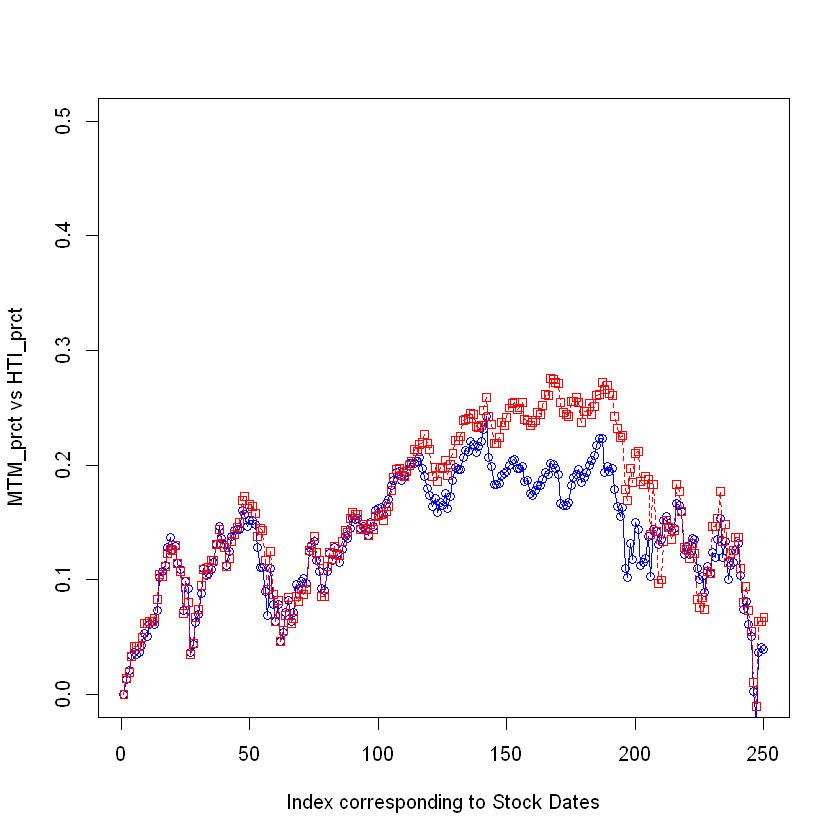

In [10]:
#Plotting a graph of MTM vs HTI on the percentage change values with respect to Jan 02, 2018.
#The x-axis ranges from 1 - 250. This is index value from the stocks dataframe corresponding to the respective Stocks Dates.
plot(stocks$MTM_prct, type="o", col="blue", ylim=c(0,0.5),ann = FALSE)
lines(stocks$HTI_prct, type="o", pch=22, lty=2, col="red")
title(ylab="MTM_prct vs HTI_prct")
title(xlab="Index corresponding to Stock Dates")

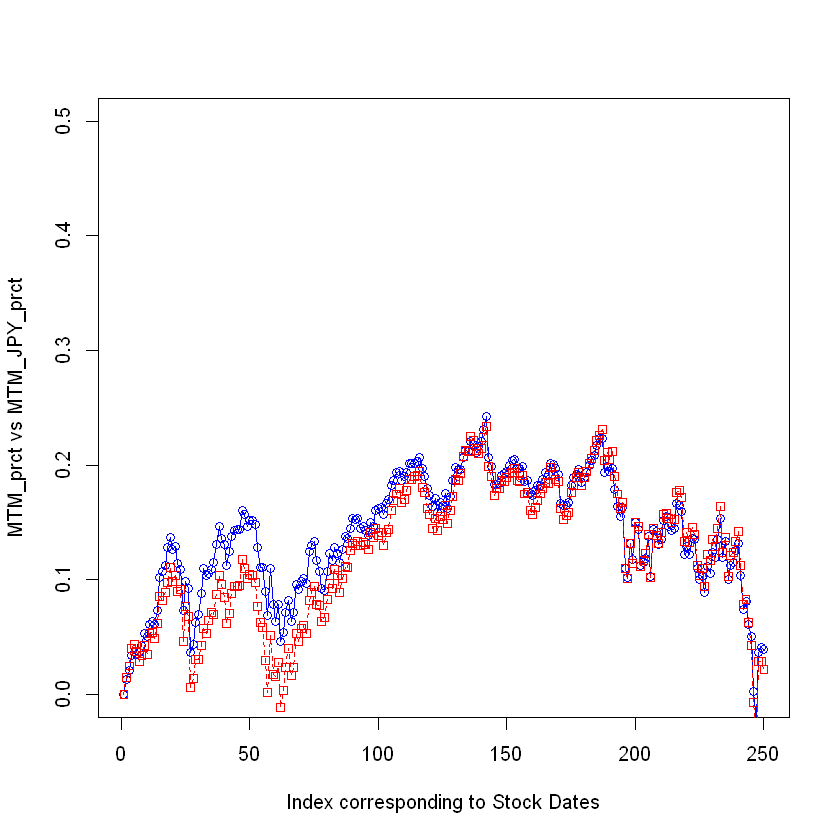

In [11]:
#Plotting a graph of MTM vs MTM_JPY on the percentage change values with respect to Jan 02, 2018.
#The x-axis ranges from 1 - 250. This is index value from the stocks dataframe corresponding to the respective Stocks Dates.
plot(stocks$MTM_prct, type="o", col="blue", ylim=c(0,0.5),ann = FALSE)
lines(stocks$MTM_JPY_prct, type="o", pch=22, lty=2, col="red")
title(ylab="MTM_prct vs MTM_JPY_prct")
title(xlab="Index corresponding to Stock Dates")

## Conclusion
After trying the 2 strategies and changing the number of rebalancing days, we found the best strategy was **"11 days rebalancing of buying high"**

# Thank You!